In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [334]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [336]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [337]:
#Let's fix the the labels
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['yr'] = df['yr'].map({0:2018, 1:2019})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:>

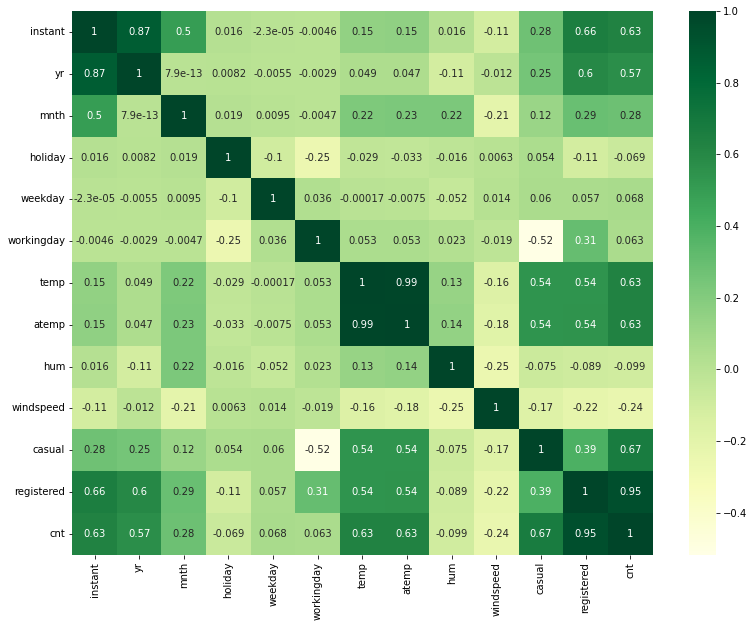

In [338]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGn')

In [339]:
#Drop unecessary columns
df.drop(columns=['instant',	'dteday', 'temp', 'casual', 'registered'], inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600


In [340]:
#Check if null
df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<AxesSubplot:xlabel='atemp'>

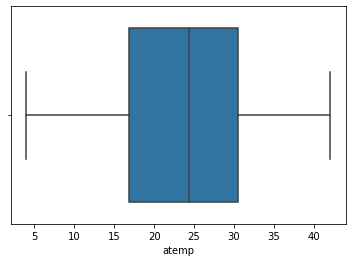

In [341]:
#Univariate Anlysis
sns.boxplot(df['atemp'])

<AxesSubplot:xlabel='hum'>

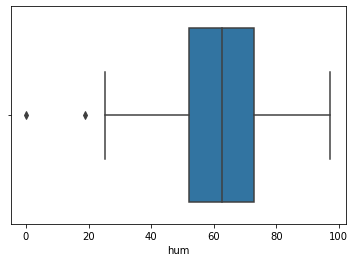

In [342]:
sns.boxplot(df['hum'])

In [343]:
#Let's drop the outliers
IQR = np.percentile(df['hum'], 75) - np.percentile(df['hum'], 25)
lower_limt = np.percentile(df['hum'], 25) - (1.5*IQR)
upper_limt = np.percentile(df['hum'], 75) + (1.5*IQR)
df = df[(df['hum'] <= upper_limt) & (df['hum'] >= lower_limt)]

<AxesSubplot:xlabel='windspeed'>

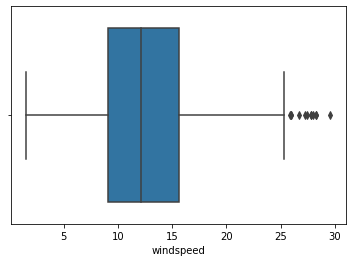

In [344]:
sns.boxplot(df['windspeed'])

In [345]:
#Let's drop the outliers
IQR = np.percentile(df['windspeed'], 75) - np.percentile(df['windspeed'], 25)
lower_limt = np.percentile(df['windspeed'], 25) - (1.5*IQR)
upper_limt = np.percentile(df['windspeed'], 75) + (1.5*IQR)
df = df[(df['windspeed'] <= upper_limt) & (df['windspeed'] >= lower_limt)]

In [346]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='season', ylabel='cnt'>

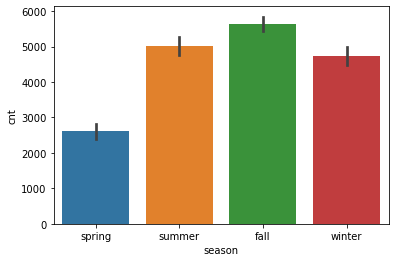

In [347]:
#Bivariate Analysis
sns.barplot(data=df, x='season', y='cnt')

In [348]:
#In fall customers like to rent bicycles compared to other seasons

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

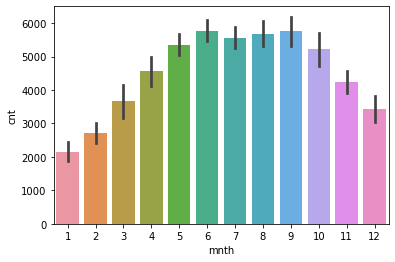

In [349]:
sns.barplot(data=df, x='mnth', y='cnt')

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

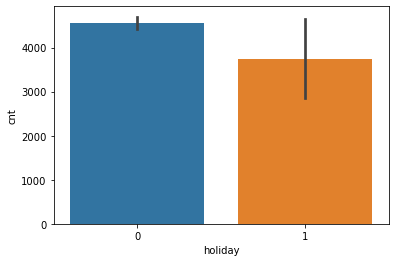

In [350]:
sns.barplot(data=df, x='holiday', y='cnt')

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

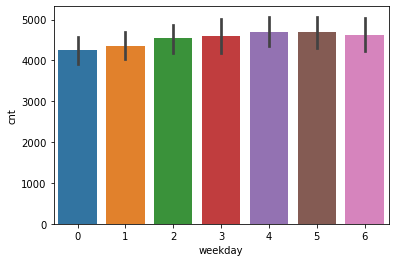

In [351]:
sns.barplot(data=df, x='weekday', y='cnt')

In [352]:
#There is no any relation between weekday and cnt. So we can drop this column
df.drop(columns=['weekday'], inplace=True)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

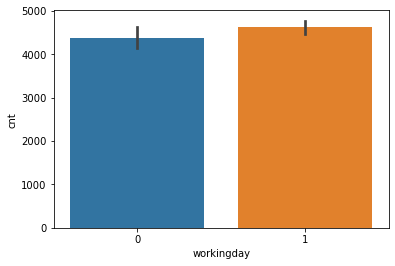

In [353]:
sns.barplot(data=df, x='workingday', y='cnt')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

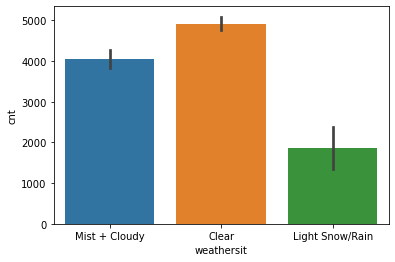

In [354]:
sns.barplot(data=df, x='weathersit', y='cnt')

In [355]:
df

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,1,Clear,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,1,Mist + Cloudy,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,1,Mist + Cloudy,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,0,Mist + Cloudy,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,0,Clear,11.58500,48.3333,23.500518,1796


<AxesSubplot:>

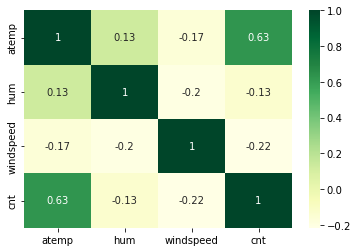

In [356]:
sns.heatmap(df.loc[:, ['atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='YlGn')

In [357]:
#We can see atemp and cnt are highly correlated

In [358]:
y = df.pop('cnt')
X = df

In [359]:
#Create dummy variables
season = pd.get_dummies(X['season'], drop_first=True)
mnth = pd.get_dummies(X['mnth'], drop_first=True)
weathersit = pd.get_dummies(X['weathersit'], drop_first=True)
# yr = pd.get_dummies(X['yr'], drop_first=True)
# week_day = pd.get_dummies(X['weekday'], drop_first=True)

In [360]:
# concat with dummy one with original df
X = pd.concat([X, season, mnth, weathersit], axis=1)
X.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,spring,...,5,6,7,8,9,10,11,12,Light Snow/Rain,Mist + Cloudy
0,spring,2018,1,0,0,Mist + Cloudy,18.18125,80.5833,10.749882,1,...,0,0,0,0,0,0,0,0,0,1
1,spring,2018,1,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,1,...,0,0,0,0,0,0,0,0,0,1
2,spring,2018,1,0,1,Clear,9.47025,43.7273,16.636703,1,...,0,0,0,0,0,0,0,0,0,0
3,spring,2018,1,0,1,Clear,10.60610,59.0435,10.739832,1,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,1,0,1,Clear,11.46350,43.6957,12.522300,1,...,0,0,0,0,0,0,0,0,0,0


In [361]:
#Drop the old categorical columns
X.drop(columns=['season', 'weathersit', 'mnth'], inplace=True)
X.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,5,6,7,8,9,10,11,12,Light Snow/Rain,Mist + Cloudy
0,2018,0,0,18.18125,80.5833,10.749882,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018,0,1,9.47025,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,1,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,0,1,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
#Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [363]:
#Scale the features
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [364]:
#Train Model
X_train_sm = X_train.copy()
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()
lr_model.params

const             -4.090945e+06
yr                 2.028481e+03
holiday           -4.508537e+02
workingday         1.920435e+02
atemp              3.490954e+03
hum               -1.166618e+03
windspeed         -7.627337e+02
spring            -1.050251e+03
summer            -1.029092e+02
winter             6.239730e+02
2                  1.603673e+02
3                  5.351887e+02
4                  4.490694e+02
5                  7.794592e+02
6                  6.032895e+02
7                 -3.318809e+01
8                  4.188801e+02
9                  1.041290e+03
10                 5.062576e+02
11                -2.176712e+02
12                -1.809290e+02
Light Snow/Rain   -1.964829e+03
Mist + Cloudy     -4.469064e+02
dtype: float64

In [365]:
X_test_sm = X_test.copy()
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.shape

#Prdict
y_test_pred = lr_model.predict(X_test_sm)

#Evaluate
r2_score(y_test, y_test_pred)

0.8303500874618194

In [366]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.68e-204
Time:                        22:34:21   Log-Likelihood:                -4608.8
No. Observations:                 572   AIC:                             9264.
Df Residuals:                     549   BIC:                             9364.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.091e+06   1.35e+05    -30.283      0.000   -4.36e+06   -3.83e+06
yr               2028.4811     66.924     30.310      0.000    1897.022    2159.940
holiday          -450.8537    201.315     -2.240      0.026    -846.295     -55.412
workingday        192.0435     72.122      2.663      0.008      50.375     333.712
atemp            3490.9538    371.769      9.390      0.000    2760.690    4221.217
hum             -1166.6178    254.443     -4.585      0.000   -1666.419    -666.817
windspeed        -762.7337    176.156     -4.330      0.000   -1108.756    -416.711
spring          -1050.2506    250.045     -4.200      0.000   -1541.412    -559.089
summer           -102.9092    213.091     -0.483      0.629    -521.482     315.664
winter            623.9730    223.178      2.796      0.005     185.585    1062.361
2                 160.3673    169.676      0.945      0.345    -172.926     493.661
3                 535.1887    193.476      2.766      0.006     155.145     915.232
4                 449.0694    287.238      1.563      0.119    -115.151    1013.290
5                 779.4592    305.517      2.551      0.011     179.334    1379.584
6                 603.2895    315.242      1.914      0.056     -15.938    1222.517
7                 -33.1881    350.633     -0.095      0.925    -721.934     655.558
8                 418.8801    337.343      1.242      0.215    -243.760    1081.521
9                1041.2900    302.929      3.437      0.001     446.249    1636.331
10                506.2576    280.095      1.807      0.071     -43.931    1056.446
11               -217.6712    267.446     -0.814      0.416    -743.013     307.671
12               -180.9290    210.729     -0.859      0.391    -594.863     233.005
Light Snow/Rain -1964.8287    244.152     -8.048      0.000   -2444.414   -1485.243
Mist + Cloudy    -446.9064     90.289     -4.950      0.000    -624.261    -269.552
==============================================================================
Omnibus:                       75.906   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.194
Skew:                          -0.710   Prob(JB):                     2.02e-39
Kurtosis:                       5.337   Cond. No.                     8.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
#VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,yr,125.35
3,atemp,58.14
4,hum,47.28
6,spring,13.40
8,winter,10.97
7,summer,10.49
14,7,9.89
5,windspeed,9.26
15,8,9.08
13,6,7.72


In [368]:
#drop atemp and train
col = X_train.columns.drop('atemp')
X_train_sm = X_train[col]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const             -4.282261e+06
yr                 2.123616e+03
holiday           -3.344699e+02
workingday         2.644947e+02
hum               -5.050654e+02
windspeed         -7.562698e+02
spring            -1.318863e+03
summer            -3.450162e+02
winter             5.091163e+02
2                  4.471524e+02
3                  1.200580e+03
4                  1.416574e+03
5                  2.150842e+03
6                  2.271095e+03
7                  1.782894e+03
8                  1.941057e+03
9                  2.272794e+03
10                 1.365673e+03
11                 1.681727e+02
12                 6.878695e+01
Light Snow/Rain   -2.398035e+03
Mist + Cloudy     -6.025941e+02
dtype: float64

In [369]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          6.45e-188
Time:                        22:34:34   Log-Likelihood:                -4651.4
No. Observations:                 572   AIC:                             9347.
Df Residuals:                     550   BIC:                             9442.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.282e+06   1.44e+05    -29.792      0.000   -4.56e+06      -4e+06
yr               2123.6164     71.203     29.825      0.000    1983.753    2263.479
holiday          -334.4699    216.271     -1.547      0.123    -759.289      90.349
workingday        264.4947     77.182      3.427      0.001     112.888     416.102
hum              -505.0654    263.159     -1.919      0.055   -1021.984      11.854
windspeed        -756.2698    189.602     -3.989      0.000   -1128.702    -383.838
spring          -1318.8629    267.365     -4.933      0.000   -1844.044    -793.682
summer           -345.0162    227.672     -1.515      0.130    -792.230     102.197
winter            509.1163    239.854      2.123      0.034      37.975     980.258
2                 447.1524    179.646      2.489      0.013      94.277     800.028
3                1200.5800    193.775      6.196      0.000     819.950    1581.210
4                1416.5739    288.590      4.909      0.000     849.700    1983.448
5                2150.8419    288.834      7.447      0.000    1583.490    2718.194
6                2271.0947    280.325      8.102      0.000    1720.456    2821.734
7                1782.8943    314.795      5.664      0.000    1164.546    2401.242
8                1941.0565    318.425      6.096      0.000    1315.578    2566.535
9                2272.7937    293.912      7.733      0.000    1695.466    2850.121
10               1365.6730    284.927      4.793      0.000     805.994    1925.352
11                168.1727    284.443      0.591      0.555    -390.556     726.901
12                 68.7870    225.002      0.306      0.760    -373.181     510.755
Light Snow/Rain -2398.0345    258.055     -9.293      0.000   -2904.929   -1891.140
Mist + Cloudy    -602.5941     95.529     -6.308      0.000    -790.240    -414.948
==============================================================================
Omnibus:                       60.444   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.920
Skew:                          -0.604   Prob(JB):                     1.01e-28
Kurtosis:                       4.988   Cond. No.                     8.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [370]:
X_test_sm = X_test[col]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.shape
#Prdict
y_test_pred = lr_model.predict(X_test_sm)
#Evaluate
r2_score(y_test, y_test_pred)

0.8037233143955026

In [371]:
#Prdict
y_test_pred = lr_model.predict(X_test_sm)

In [372]:
#Evaluate
r2_score(y_test, y_test_pred)

0.8037233143955026

In [373]:
from sklearn.feature_selection import RFE

In [374]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [375]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', False, 6),
 (2, False, 11),
 (3, False, 3),
 (4, False, 7),
 (5, False, 2),
 (6, False, 4),
 (7, False, 13),
 (8, False, 5),
 (9, True, 1),
 (10, True, 1),
 (11, False, 8),
 (12, False, 9),
 ('Light Snow/Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [376]:
col = X_train.columns[rfe.support_]
col

Index([             'yr',         'holiday',           'atemp',
                   'hum',       'windspeed',          'spring',
                       9,                10, 'Light Snow/Rain',
         'Mist + Cloudy'],
      dtype='object')

In [377]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'winter', 2, 3, 4, 5, 6, 7, 8, 11, 12], dtype='object')

In [378]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [379]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.81e-208
Time:                        22:35:10   Log-Likelihood:                -4633.1
No. Observations:                 572   AIC:                             9288.
Df Residuals:                     561   BIC:                             9336.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.122e+06   1.38e+05    -29.969      0.000   -4.39e+06   -3.85e+06
yr               2043.9445     68.129     30.001      0.000    1910.125    2177.764
holiday          -694.5584    198.730     -3.495      0.001   -1084.905    -304.212
atemp            3362.5042    210.878     15.945      0.000    2948.298    3776.710
hum              -999.3976    249.994     -3.998      0.000   -1490.435    -508.360
windspeed        -676.5256    177.335     -3.815      0.000   -1024.847    -328.204
spring          -1345.8511    104.728    -12.851      0.000   -1551.558   -1140.144
9                 803.8376    127.818      6.289      0.000     552.778    1054.897
10                724.7440    125.361      5.781      0.000     478.509     970.979
Light Snow/Rain -2143.7245    247.676     -8.655      0.000   -2630.210   -1657.239
Mist + Cloudy    -457.4904     91.977     -4.974      0.000    -638.151    -276.830
==============================================================================
Omnibus:                       85.425   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.180
Skew:                          -0.860   Prob(JB):                     8.21e-37
Kurtosis:                       5.004   Cond. No.                     8.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""